<a href="https://colab.research.google.com/github/SwethaVipparla/Tensorflow/blob/master/Advanced%20Tensorflow%20Usage/TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9136 - val_loss: 0.1534 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1458 - accuracy: 0.9567 - val_loss: 0.1030 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1092 - accuracy: 0.9666 - val_loss: 0.0895 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0779 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.9758 - val_loss: 0.0753 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.0735 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9803 - val_loss: 0.0733 - val_accuracy:

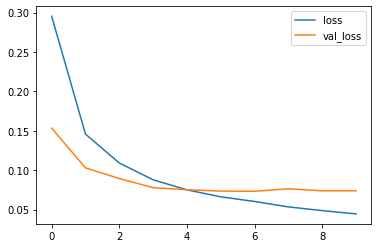

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

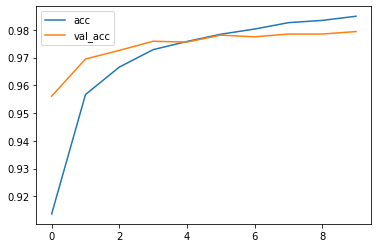

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9794
[0.07392418384552002, 0.9793999791145325]


In [9]:
# Convert the model to TFLite format

# Create a converter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save to file
with open("converted_model.tflite", "wb") as f:
  f.write(tflite_model)

In [10]:
# Check if it exists
!ls

converted_model.tflite	sample_data
